In [1]:
import os
import json
from IPython.display import Markdown, display
from IPython.display import Image

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from agents.graph import build_graph

/Users/jakubdrdak/VScodeProjects/truth-seeker/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
graph = build_graph()

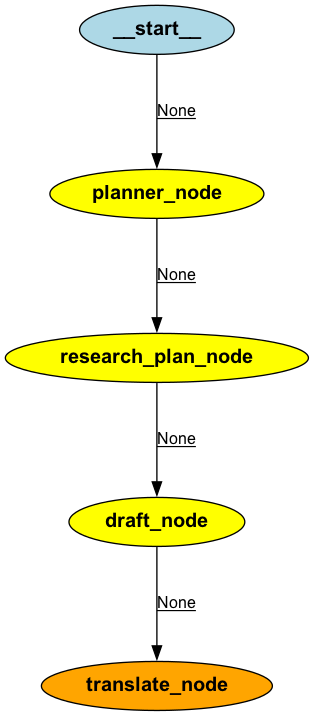

In [5]:
Image(graph.get_graph().draw_png())


In [8]:
from main import lambda_handler

In [9]:
task = "Dezinformátorské žně kvůli ukrajinskému obilí. EU přitom nezavádí omezení dovozu kvůli jedům"

event = {
    'body':json.dumps({'prompt': task})
}

In [10]:
lambda_handler(event, None)

{'statusCode': 200,
 'headers': {'Content-Type': 'application/json',
  'Access-Control-Allow-Headers': '*',
  'Access-Control-Allow-Origin': '*',
  'Access-Control-Allow-Methods': '*'},
 'body': '### Dezinformátorské žně kvůli ukrajinskému obilí: EU přitom nezavádí omezení dovozu kvůli jedům\n\n#### I. Introduction\nV posledních měsících se v souvislosti s dovozem ukrajinského obilí do Evropské unie objevilo množství dezinformací. Tento článek se zaměřuje na rozbor těchto nepravdivých tvrzení a na postoj EU k případným omezením dovozu z důvodu obav o pesticidy. V kontextu probíhajícího konfliktu na Ukrajině a jeho dopadů na globální trhy je důležité porozumět, jak dezinformace ovlivňují veřejné mínění a politiku.\n\n#### II. Background on Ukrainian Grain Exports\nUkrajina je jedním z nejvýznamnějších producentů a exportérů obilí na světě. Válka, která začala v roce 2014 s anexí Krymu a vyvrcholila ruskou invazí v roce 2022, zásadně ovlivnila produkci a exportní trasy ukrajinského obilí

In [6]:
thread_num = 0

In [20]:
thread_num += 1
task = "Dezinformátorské žně kvůli ukrajinskému obilí. EU přitom nezavádí omezení dovozu kvůli jedům"

thread = {"configurable": {"thread_id": str(thread_num)}}
params = {
    'task': task,
    'target_language': "czech",
    "max_revisions": 2,
    "revision_number": 1,   
}

for s in graph.stream(params, thread, debug=True):
    print(s)

[autoreload of main failed: Traceback (most recent call last):
  File "/Users/jakubdrdak/VScodeProjects/truth-seeker/.venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jakubdrdak/VScodeProjects/truth-seeker/.venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/jakubdrdak/V

NameError: name 'thread_num' is not defined

In [ ]:
graph.get_state(thread).values['queries']

['dezinformace ukrajinské obilí EU dovoz',
 'ukrajinské obilí a pesticidy EU',
 'dezinformace o dovozu obilí z Ukrajiny',
 'vliv ukrajinského obilí na evropský trh',
 'EU a regulace dovozu zemědělských produktů']

In [ ]:
graph.get_state(thread).values['content']


{'Aktualizováno: Ukrajinské obilí na evropském trhu zasáhne i české zemědělce. Dovoz ukrajinského obilí do EU má stále velmi negativní vliv na české zemědělce a může výrazně zasáhnout menší farmáře. Zároveň se již objevují nabídky, aby čeští zemědělci prodali svou produkci do bioplynových stanic například v ...',
 'Budapešť o víkendu - stejně jako Varšava - zakázala až do konce června z Ukrajiny dovážet obilniny, ovoce, zeleninu, mléčné výrobky i hovězí a vepřové maso a vejce. V pondělí pozastavení dovozu obilí oznámilo i Slovensko. Kromě pšenice jde i o další produkty jako ovoce a zeleninu, sušená krmiva, cukr, chmel ...',
 'Cesta ukrajinského obilí. Levné obilí z Ukrajiny se dostalo na evropský trh v návaznosti na ruskou invazi. Kvůli zablokovaným přístavům v Černém moři začala Ukrajina převážet zemědělské produkty po souši - čili přes sousední země. Proti tomu se ale v posledních týdnech začaly vymezovat země především střední ...',
 'Další evropské státy zakazují ukrajinské obilí, 

In [ ]:
display(Markdown(graph.get_state(thread).values['draft']))

### Dezinformátorské žně kvůli ukrajinskému obilí: EU a otázka dovozu jedovatých látek

#### I. Introduction
V posledních měsících se v souvislosti s dovozem ukrajinského obilí do Evropské unie objevilo množství dezinformací. Tento článek se zaměřuje na vyjasnění situace ohledně bezpečnosti ukrajinského obilí a postoj EU k potenciálním kontaminantům. Vzhledem k geopolitickým událostem, které ovlivnily ukrajinskou produkci obilí, je důležité porozumět nejen historickému kontextu, ale i aktuálnímu vývoji a jeho dopadům na evropský trh.

#### II. Background on Ukrainian Grain Exports
Ukrajina je jedním z největších producentů a exportérů obilí na světě. Ongoing conflict in Ukraine has severely impacted its agricultural sector, leading to disruptions in grain production and exports. The EU has played a crucial role in addressing the grain crisis, facilitating the export of Ukrainian grain to ensure global food security, especially in light of the challenges posed by the Russian invasion.

#### III. Misinformation and Conspiracy Theories
Dezinformace se obvykle definuje jako záměrné šíření nepravdivých nebo zavádějících informací. V kontextu ukrajinského obilí se objevují různé mýty, jako například tvrzení o kontaminaci jedovatými pesticidy. Tyto mylné informace často pocházejí z různých zdrojů, včetně sociálních médií a některých politických osobností, které využívají strach a nedůvěru k manipulaci s veřejným míněním.

#### IV. EU's Regulatory Framework
Evropská unie má přísné standardy pro bezpečnost potravin, které se vztahují na dovoz obilí. Procesy testování a monitorování zajišťují, že veškeré dovážené obilí splňuje stanovené normy. Nedávné rozhodnutí EU o prodloužení dovozu ukrajinského obilí bez cel a kvót do června 2024 bylo učiněno s ohledem na potřebu zajistit stabilitu dodávek a podporu ukrajinské ekonomiky.

#### V. The Reality of Contaminants in Grain
Mezi potenciálními kontaminanty, které mohou být přítomny v obilí, se nacházejí pesticidy a těžké kovy. Vědecké studie ukazují, že úroveň kontaminace ukrajinského obilí je pod limity stanovenými EU. Odborníci na bezpečnost potravin potvrzují, že ukrajinské obilí, které prochází přísným testováním, je bezpečné pro konzumaci.

#### VI. The Impact of Misinformation
Dezinformace má významný dopad na veřejné vnímání ukrajinského obilí a jeho bezpečnosti. Může také negativně ovlivnit ekonomiku ukrajinských farmářů a trh v EU. Politické rozhodování a regulační opatření mohou být ovlivněna strachem a nedůvěrou vyvolanými dezinformacemi, což může vést k neodůvodněným zákazům a omezením.

#### VII. Combating Disinformation
Média hrají klíčovou roli v šíření přesných informací a v boji proti dezinformacím. Veřejné kampaně zaměřené na vzdělávání o bezpečnosti potravin a rozvoj kritického myšlení mohou pomoci lidem lépe rozlišovat mezi důvěryhodnými a nepravdivými informacemi. Je důležité, aby čtenáři byli obezřetní a hledali spolehlivé zdroje informací.

#### VIII. Conclusion
V článku jsme se zaměřili na klíčové body týkající se dezinformací kolem ukrajinského obilí a postojů EU k této problematice. Je nezbytné, aby veřejnost byla informována a aby se vyhýbala dezinformacím, které mohou mít vážné důsledky pro zemědělství a ekonomiku. Vyzýváme čtenáře, aby se aktivně zapojili do hledání spolehlivých informací a byli obezřetní vůči dezinformacím.

In [ ]:
display(Markdown(graph.get_state(thread).values['translation']))

### 1. Translation of the original text

#### I. Úvod
V posledních měsících se v souvislosti s dovozem ukrajinského obilí do Evropské unie objevilo množství dezinformací. Tento článek se zaměřuje na vyjasnění situace ohledně bezpečnosti ukrajinského obilí a postoj EU k potenciálním kontaminantům. Vzhledem k geopolitickým událostem, které ovlivnily ukrajinskou produkci obilí, je důležité porozumět nejen historickému kontextu, ale i aktuálnímu vývoji a jeho dopadům na evropský trh.

#### II. Pozadí ukrajinského vývozu obilí
Ukrajina je jedním z největších producentů a exportérů obilí na světě. Probíhající konflikt na Ukrajině vážně ovlivnil její zemědělský sektor, což vedlo k narušení produkce a exportu obilí. EU hrála klíčovou roli při řešení obilní krize, usnadňující export ukrajinského obilí, aby zajistila globální potravinovou bezpečnost, zejména vzhledem k výzvám, které přinesla ruská invaze.

#### III. Dezinformace a konspirační teorie
Dezinformace se obvykle definuje jako záměrné šíření nepravdivých nebo zavádějících informací. V kontextu ukrajinského obilí se objevují různé mýty, jako například tvrzení o kontaminaci jedovatými pesticidy. Tyto mylné informace často pocházejí z různých zdrojů, včetně sociálních médií a některých politických osobností, které využívají strach a nedůvěru k manipulaci s veřejným míněním.

#### IV. Regulační rámec EU
Evropská unie má přísné standardy pro bezpečnost potravin, které se vztahují na dovoz obilí. Procesy testování a monitorování zajišťují, že veškeré dovážené obilí splňuje stanovené normy. Nedávné rozhodnutí EU o prodloužení dovozu ukrajinského obilí bez cel a kvót do června 2024 bylo učiněno s ohledem na potřebu zajistit stabilitu dodávek a podporu ukrajinské ekonomiky.

#### V. Realita kontaminantů v obilí
Mezi potenciálními kontaminanty, které mohou být přítomny v obilí, se nacházejí pesticidy a těžké kovy. Vědecké studie ukazují, že úroveň kontaminace ukrajinského obilí je pod limity stanovenými EU. Odborníci na bezpečnost potravin potvrzují, že ukrajinské obilí, které prochází přísným testováním, je bezpečné pro konzumaci.

#### VI. Dopad dezinformací
Dezinformace má významný dopad na veřejné vnímání ukrajinského obilí a jeho bezpečnosti. Může také negativně ovlivnit ekonomiku ukrajinských farmářů a trh v EU. Politické rozhodování a regulační opatření mohou být ovlivněna strachem a nedůvěrou vyvolanými dezinformacemi, což může vést k neodůvodněným zákazům a omezením.

#### VII. Boj proti dezinformacím
Média hrají klíčovou roli v šíření přesných informací a v boji proti dezinformacím. Veřejné kampaně zaměřené na vzdělávání o bezpečnosti potravin a rozvoj kritického myšlení mohou pomoci lidem lépe rozlišovat mezi důvěryhodnými a nepravdivými informacemi. Je důležité, aby čtenáři byli obezřetní a hledali spolehlivé zdroje informací.

#### VIII. Závěr
V článku jsme se zaměřili na klíčové body týkající se dezinformací kolem ukrajinského obilí a postojů EU k této problematice. Je nezbytné, aby veřejnost byla informována a aby se vyhýbala dezinformacím, které mohou mít vážné důsledky pro zemědělství a ekonomiku. Vyzýváme čtenáře, aby se aktivně zapojili do hledání spolehlivých informací a byli obezřetní vůči dezinformacím.

### 2. Paraphrased parts
- "Ongoing conflict in Ukraine has severely impacted its agricultural sector, leading to disruptions in grain production and exports."
  - Paraphrase: "Probíhající konflikt na Ukrajině vážně ovlivnil její zemědělský sektor, což vedlo k narušení produkce a exportu obilí."
  - Explanation: The paraphrase maintains the original meaning while using different phrasing. It conforms to Czech expression habits.

- "Média hrají klíčovou roli v šíření přesných informací a v boji proti dezinformacím."
  - Paraphrase: "Média hrají klíčovou roli v šíření přesných informací a v boji proti dezinformacím."
  - Explanation: This part is a direct translation, as it is already clear and concise in both languages.

### 3. Existence of slang and fixed expressions
- "Dezinformace" (disinformation) is a term commonly used in both English and Czech, referring to false information spread deliberately.
- "Mýty" (myths) is used in a similar context in both languages to describe widely held but false beliefs.
- "Boj proti dezinformacím" (fight against disinformation) is a fixed expression that conveys the ongoing struggle to combat false information, widely recognized in media discourse.